In [1]:
from fredapi import Fred # Quandl was having issues connecting with data, used this instead
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300 # I prefer high quality graphs. If I make a ton of charts I can remove this to return to defaults
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
path = r'C:\Users\rubix\Downloads\Achievement 6'

In [3]:
fred = Fred(api_key='b870dbd4b673292f38190eb54a6d934c')

In [4]:
fred

I chose the GINI index to map wealth inequality for the United States (0 is perfectly equal, 100 is perfectly unequal). My curiosity has to do with how wealth inequality affects coffee intakes (if at all).

In [5]:
data = fred.get_series('SIPOVGINIUSA')
print(data.head())

1963-01-01    36.7
1964-01-01    37.4
1965-01-01    36.8
1966-01-01    37.1
1967-01-01    36.9
dtype: float64


In [6]:
type(data)

pandas.core.series.Series

In [7]:
plt.figure(figsize=(15,5), dpi=100)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

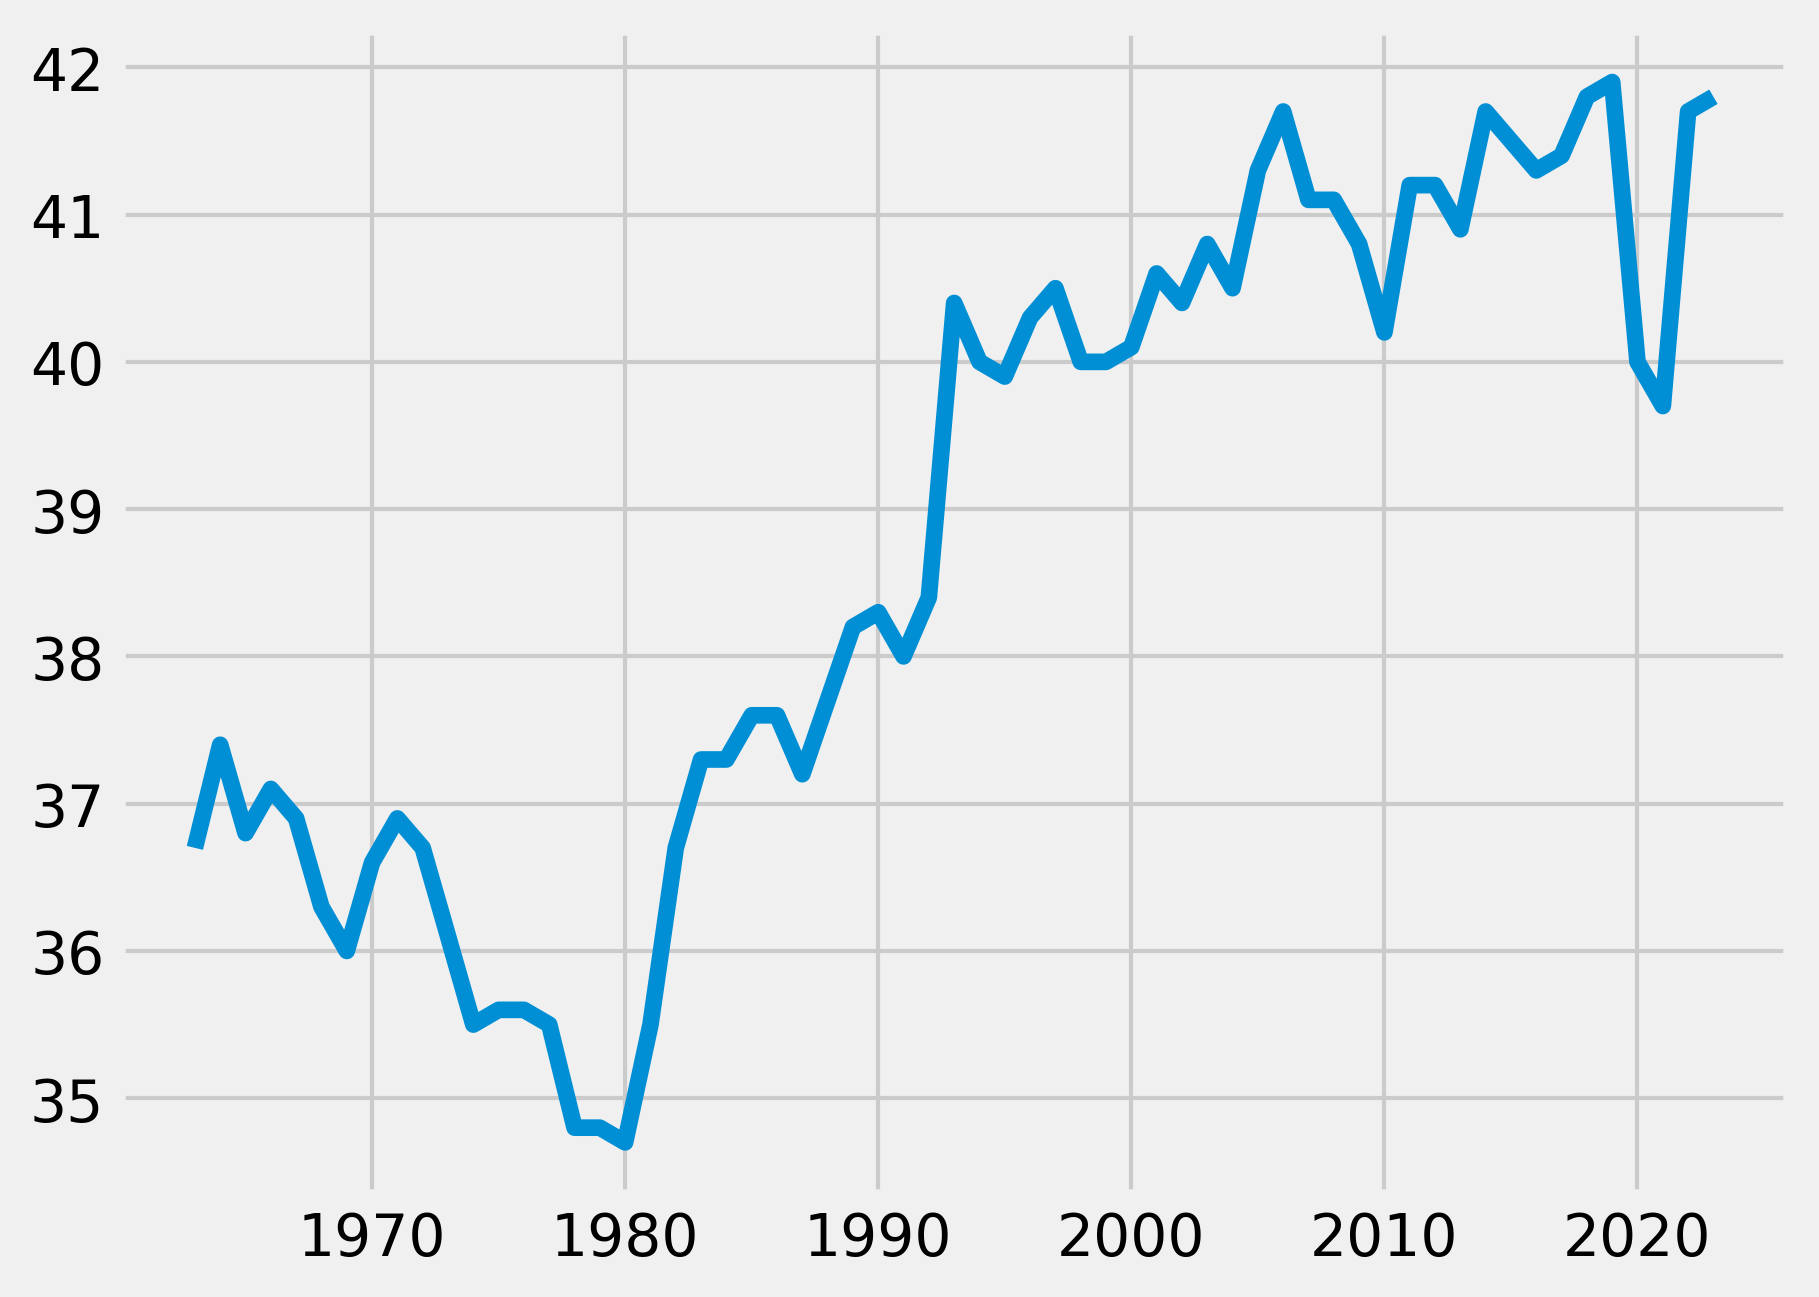

In [8]:
GINI = plt.plot(data)

In [9]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [10]:
data_2

,index,0
0,1963-01-01,36.7
1,1964-01-01,37.4
2,1965-01-01,36.8
3,1966-01-01,37.1
4,1967-01-01,36.9
...,...,...
56,2019-01-01,41.9
57,2020-01-01,40.0
58,2021-01-01,39.7
59,2022-01-01,41.7


In [11]:
data_2.shape

(61, 2)

In [12]:
data_sub = data_2.loc[(data_2['index'] >= '1963-01-01') & (data_2['index'] < '2023-01-01')]

So, I chose to subset the data but I didn't actually change the range. I'm sure there's a better way to get the format I'm looking for based on the classwork, but I didn't look into it yet so I wanted to see how far I could get with what I have.

In [13]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['index']) # Create a datetime column from index
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['index'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,0
datetime,
1963-01-01,36.7
1964-01-01,37.4
1965-01-01,36.8
1966-01-01,37.1
1967-01-01,36.9


In [14]:
first_col_name = data_sub.columns[0]
data_sub = data_sub.rename(columns={first_col_name: 'Value'})
data_sub

,Value
datetime,
1963-01-01,36.7
1964-01-01,37.4
1965-01-01,36.8
1966-01-01,37.1
1967-01-01,36.9
1968-01-01,36.3
1969-01-01,36.0
1970-01-01,36.6
1971-01-01,36.9


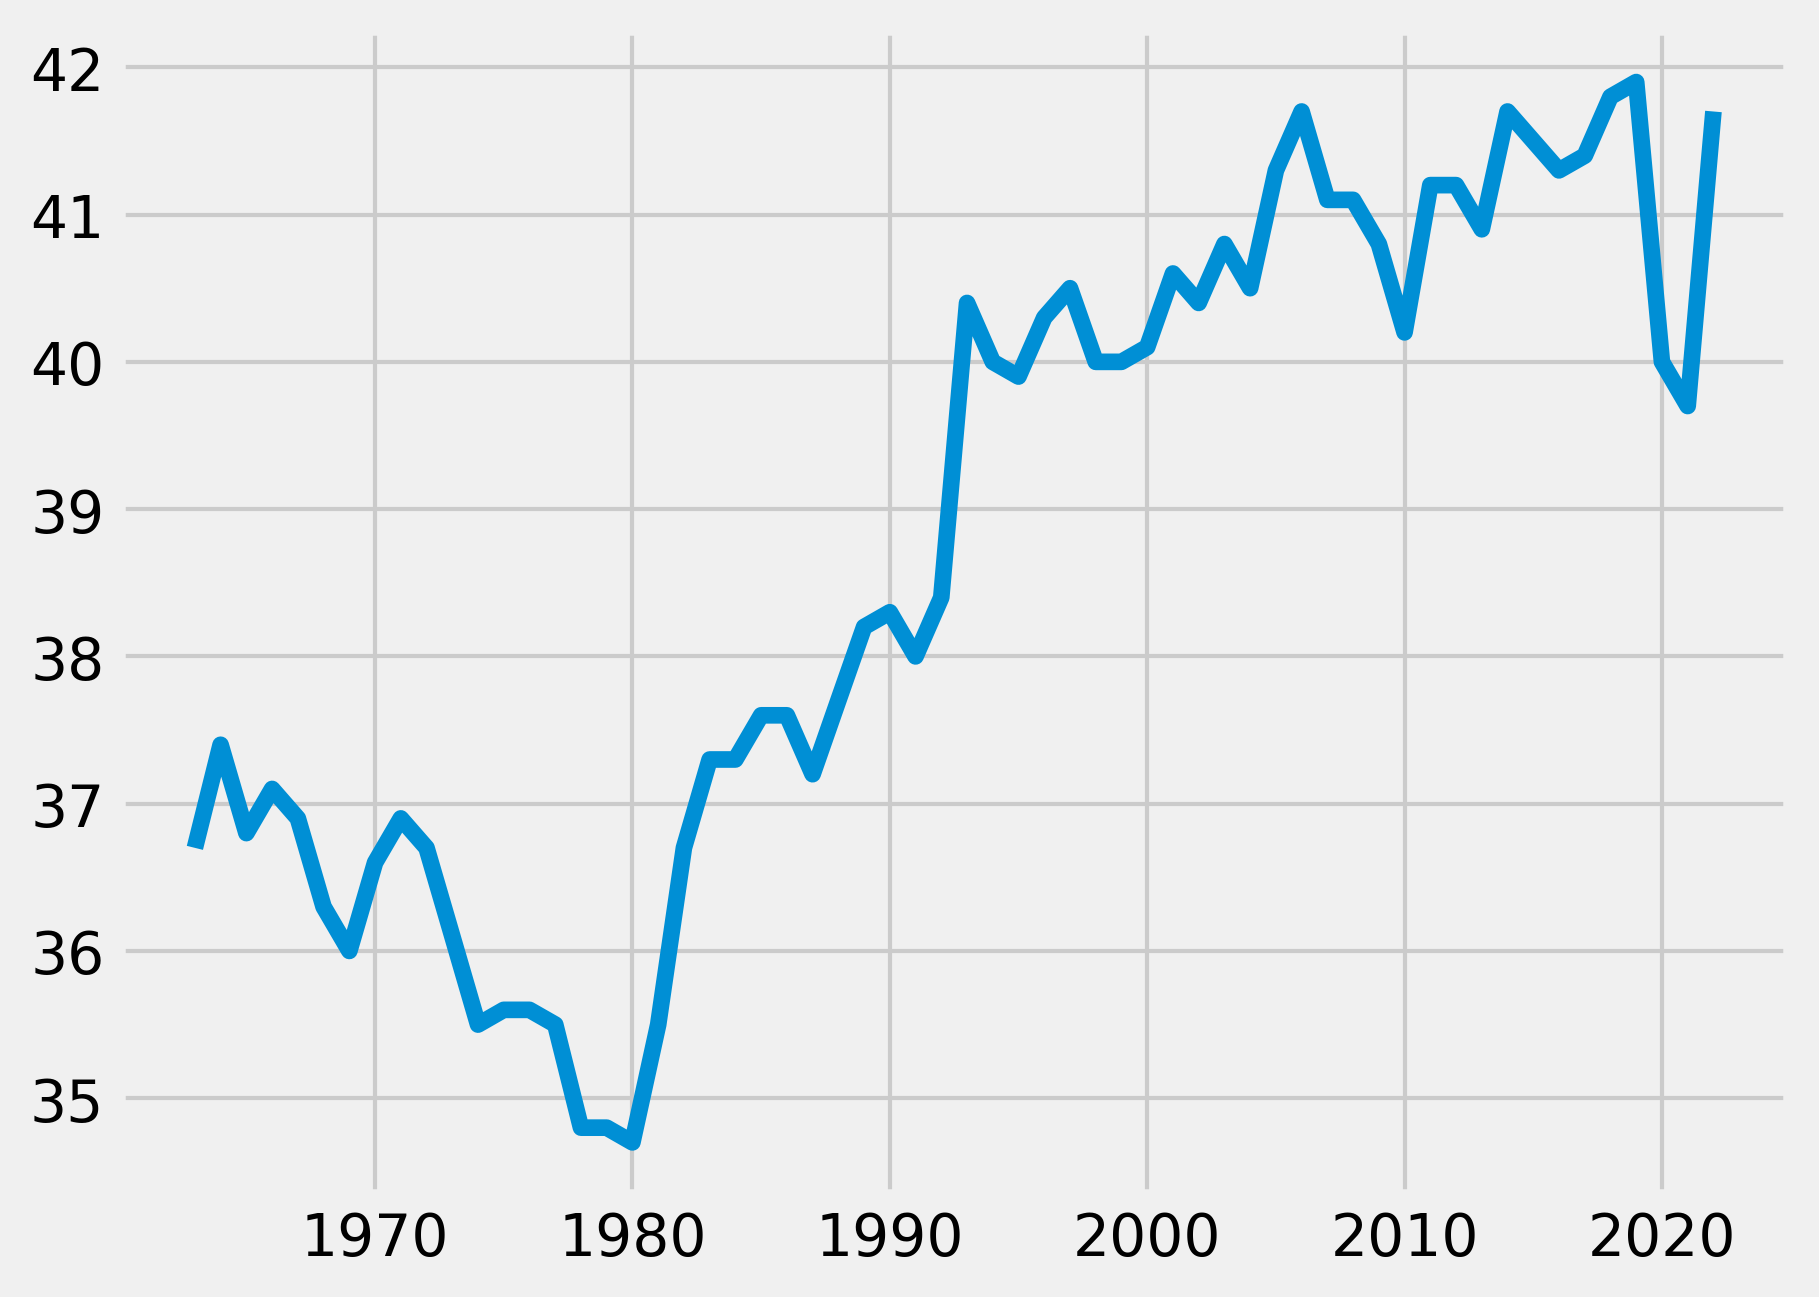

In [15]:
# Plot the new data set

plt.plot(data_sub)

In [16]:
# Check for missing values (you shouldn't have any)

data_2.isnull().sum() 

index    0
0        0
dtype: int64

No missing values. Great!

In [17]:
# Check for duplicates

dups = data_2.duplicated()
dups.sum()

np.int64(0)

No duplicates either. Nice!

In [18]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

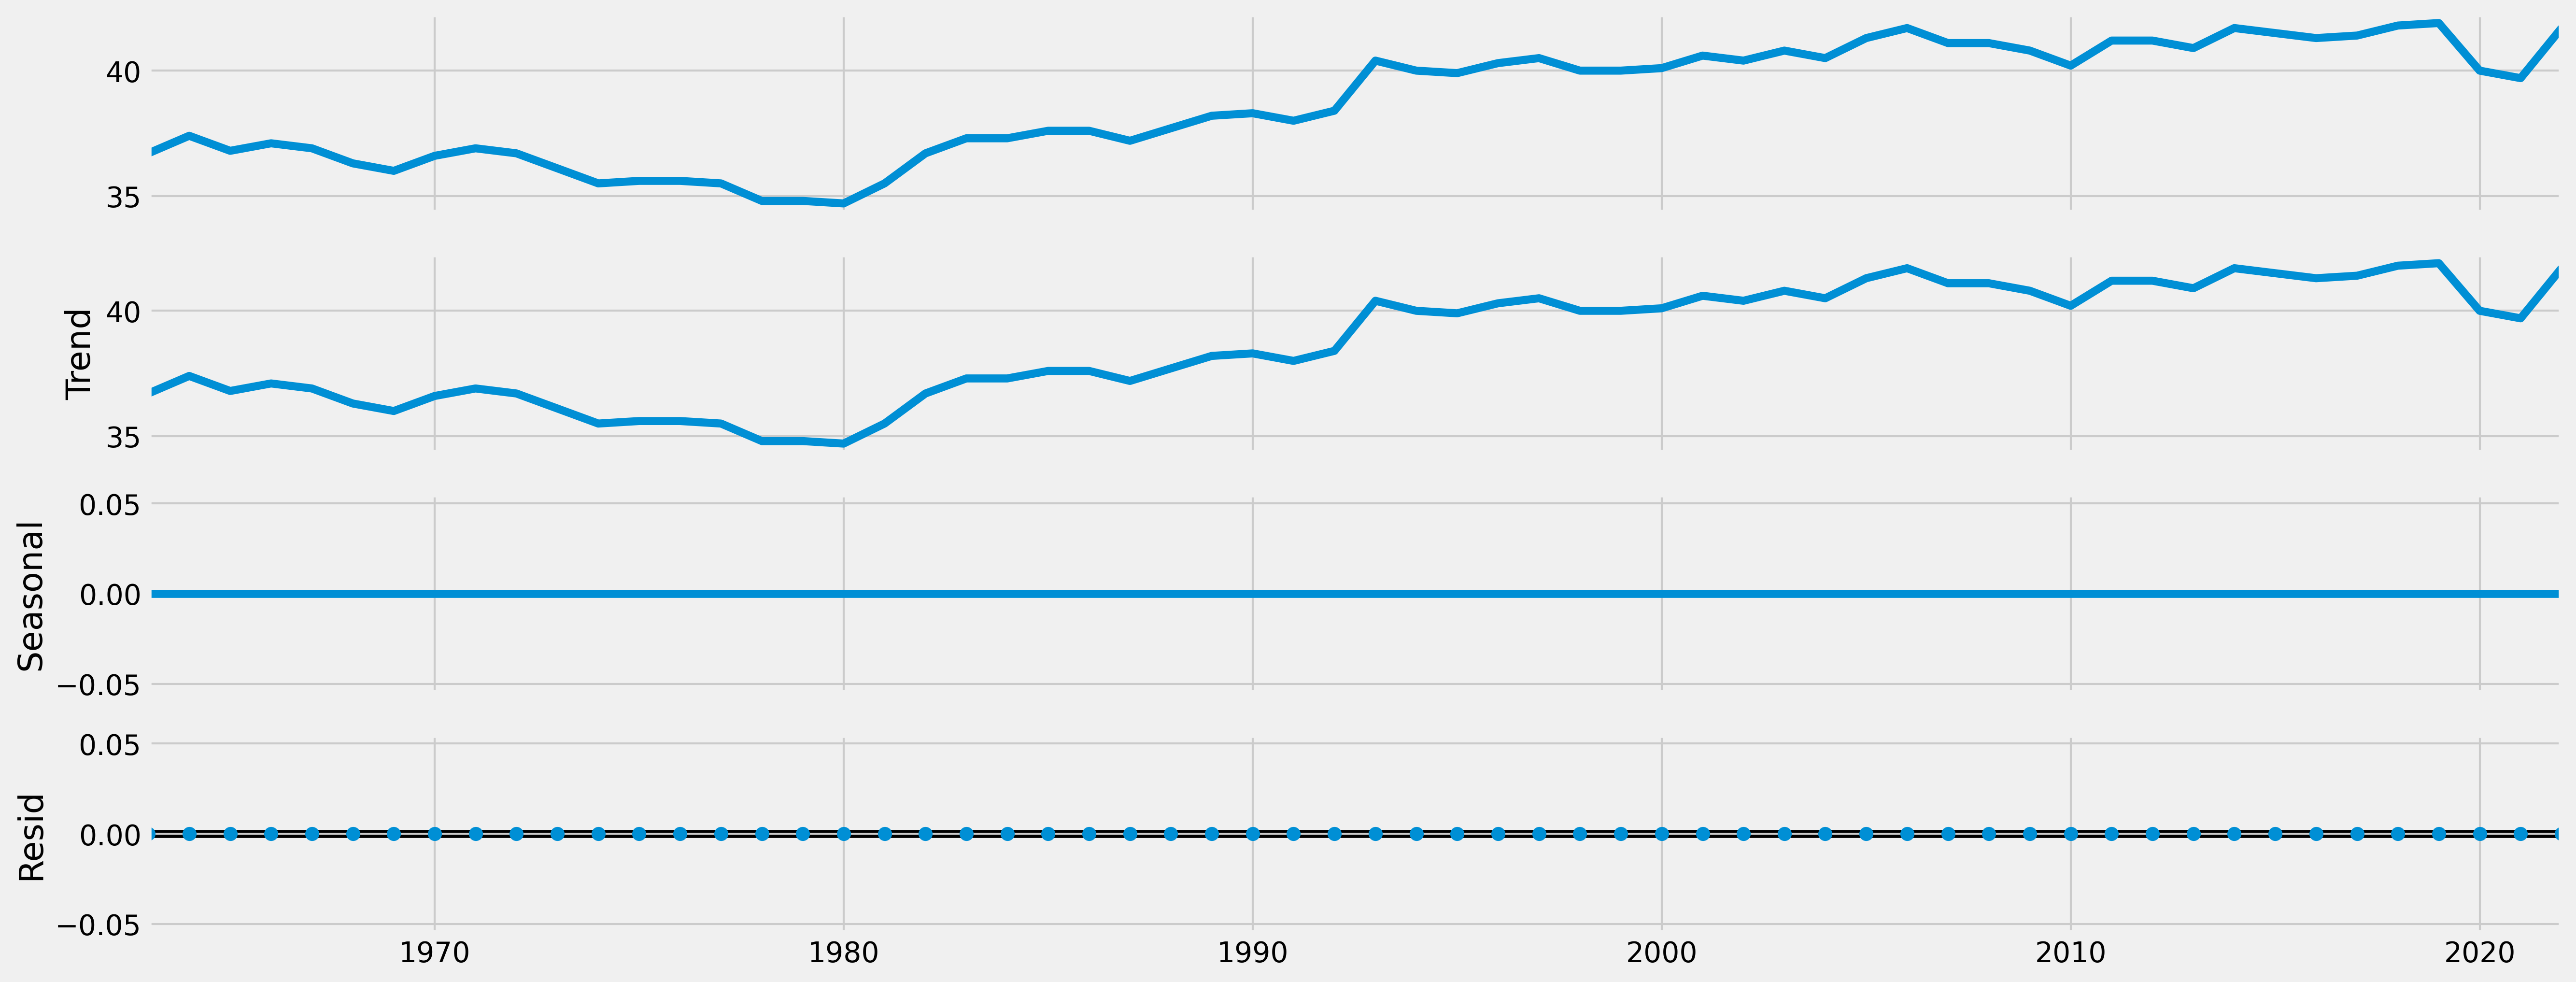

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend as a whole seems relatively stable, but also trending upward.

No seasonality or noise.

However, that's likely because the data is yearly. Not that you couldn't have cycles that are longer than years, but seasonality only looks at years so of course it's a straight line. Similar for noise (I'm guessing because of a lack of data).

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.548872
p-value                         0.882121
Number of Lags Used             2.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


The test statistic is -.54 and we want the critical values to be less than that to disprove our null hypothesis. Our critical values are all "smaller" (read as further to the left on the number line) than -.54 so it seems we've proved the null hypothesis. The p-value isn't great either.

Our hypothesis, in this case, is that as time goes on wealth inequality rises. Therefore, our null hypothesis would be no change or a decrease in wealth inequality over time.

In [22]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [23]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [24]:
data_diff.head()

,Value
datetime,
1964-01-01,0.7
1965-01-01,-0.6
1966-01-01,0.3
1967-01-01,-0.2
1968-01-01,-0.6


In [25]:
data_diff.columns

Index(['Value'], dtype='object')

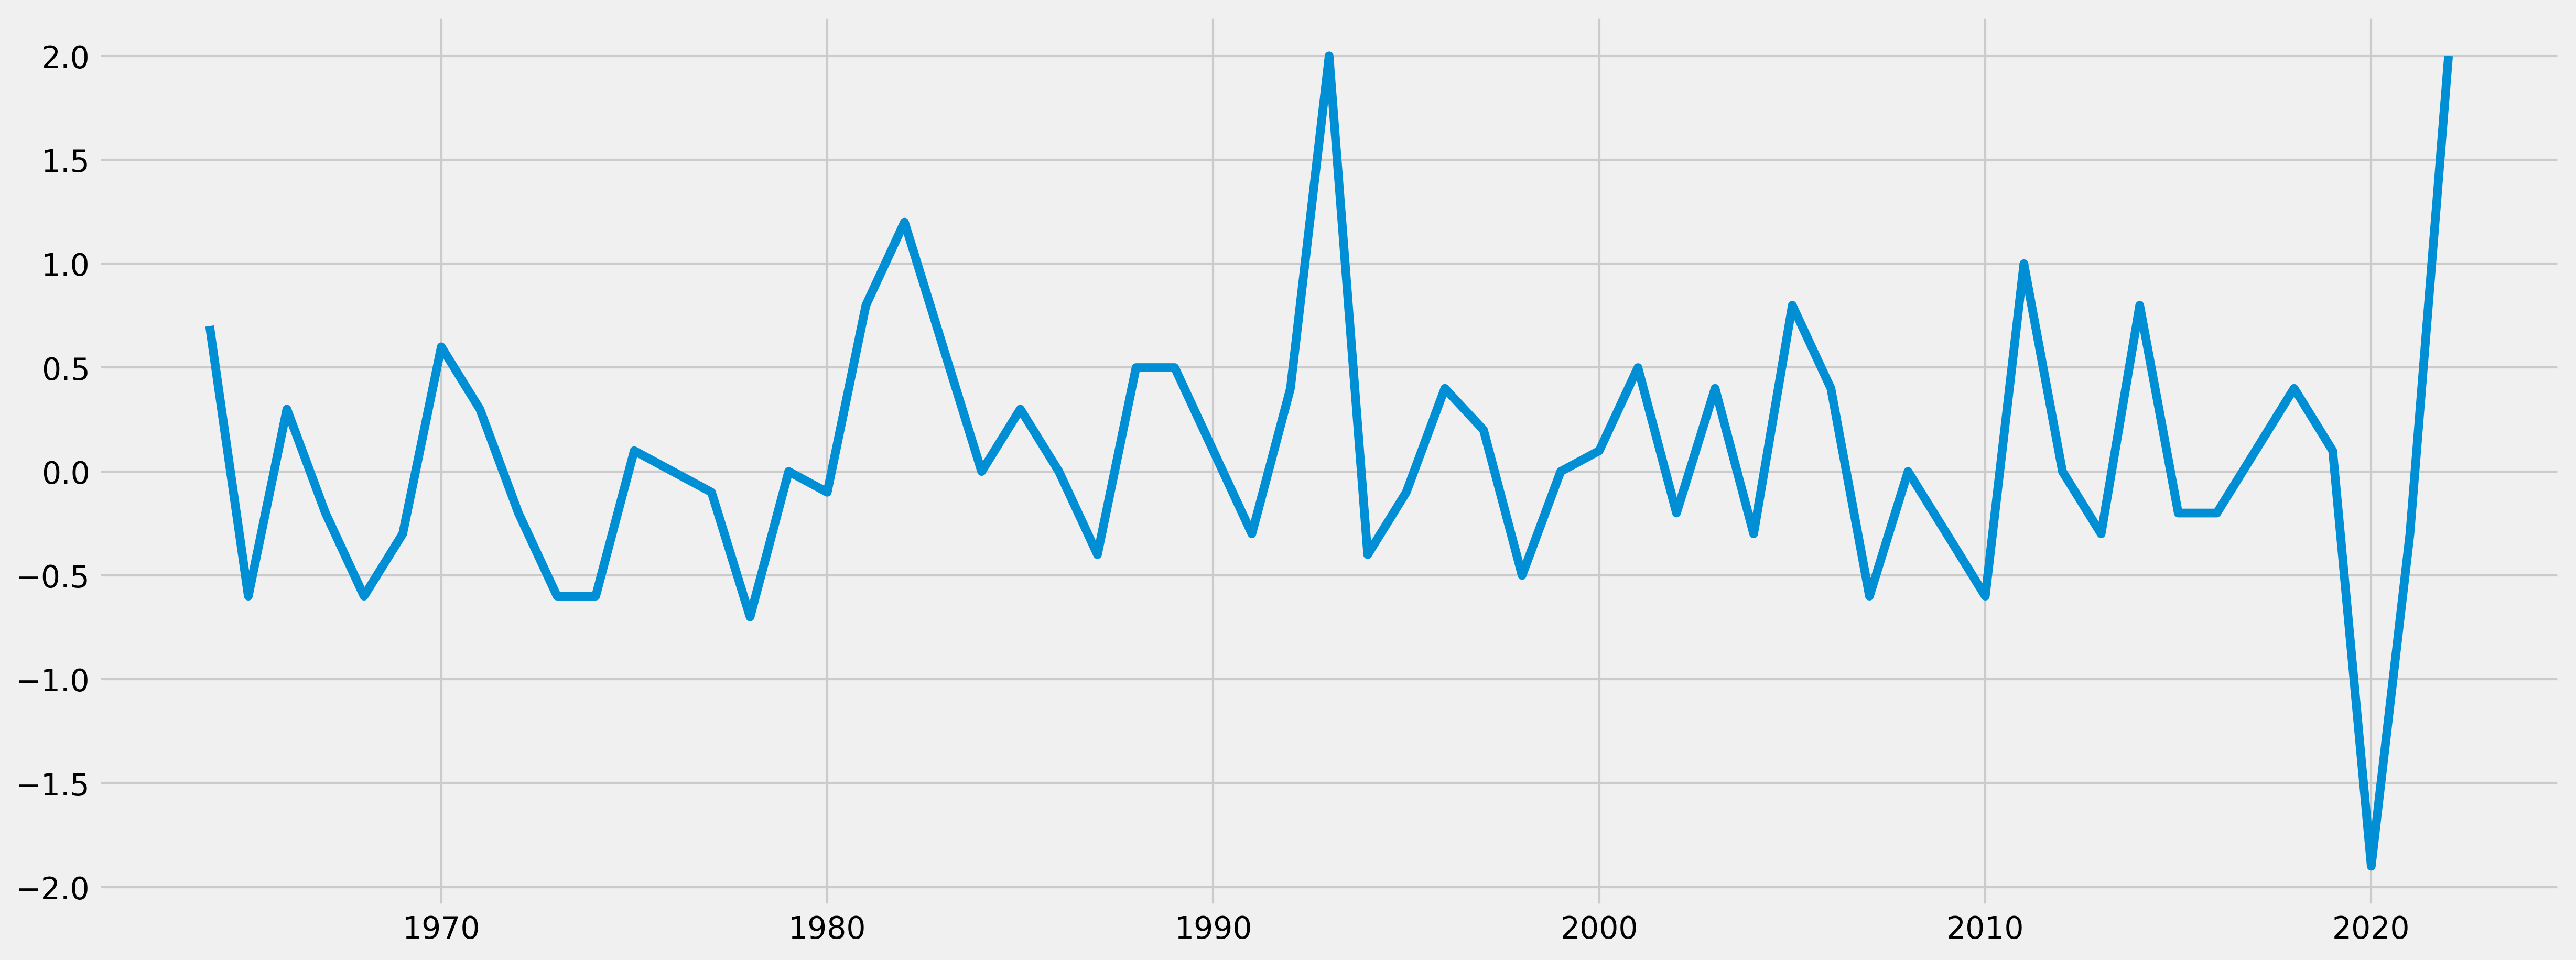

In [26]:
# What did differencing do?

plt.figure()
plt.plot(data_diff)

In [27]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.036014e+00
p-value                        6.013703e-10
Number of Lags Used            1.000000e+00
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64


Our goal to be "under" is -7.03. Our biggest critical value is -3.5 disproving/rejecting our null hypothesis.

If our test statistic is A and our critical value is B, A < B = Pass (we're aiming to disprove our hypothesis).

Our p-value is also fantastic with ten 0s after the decimal when we only needed one or two.

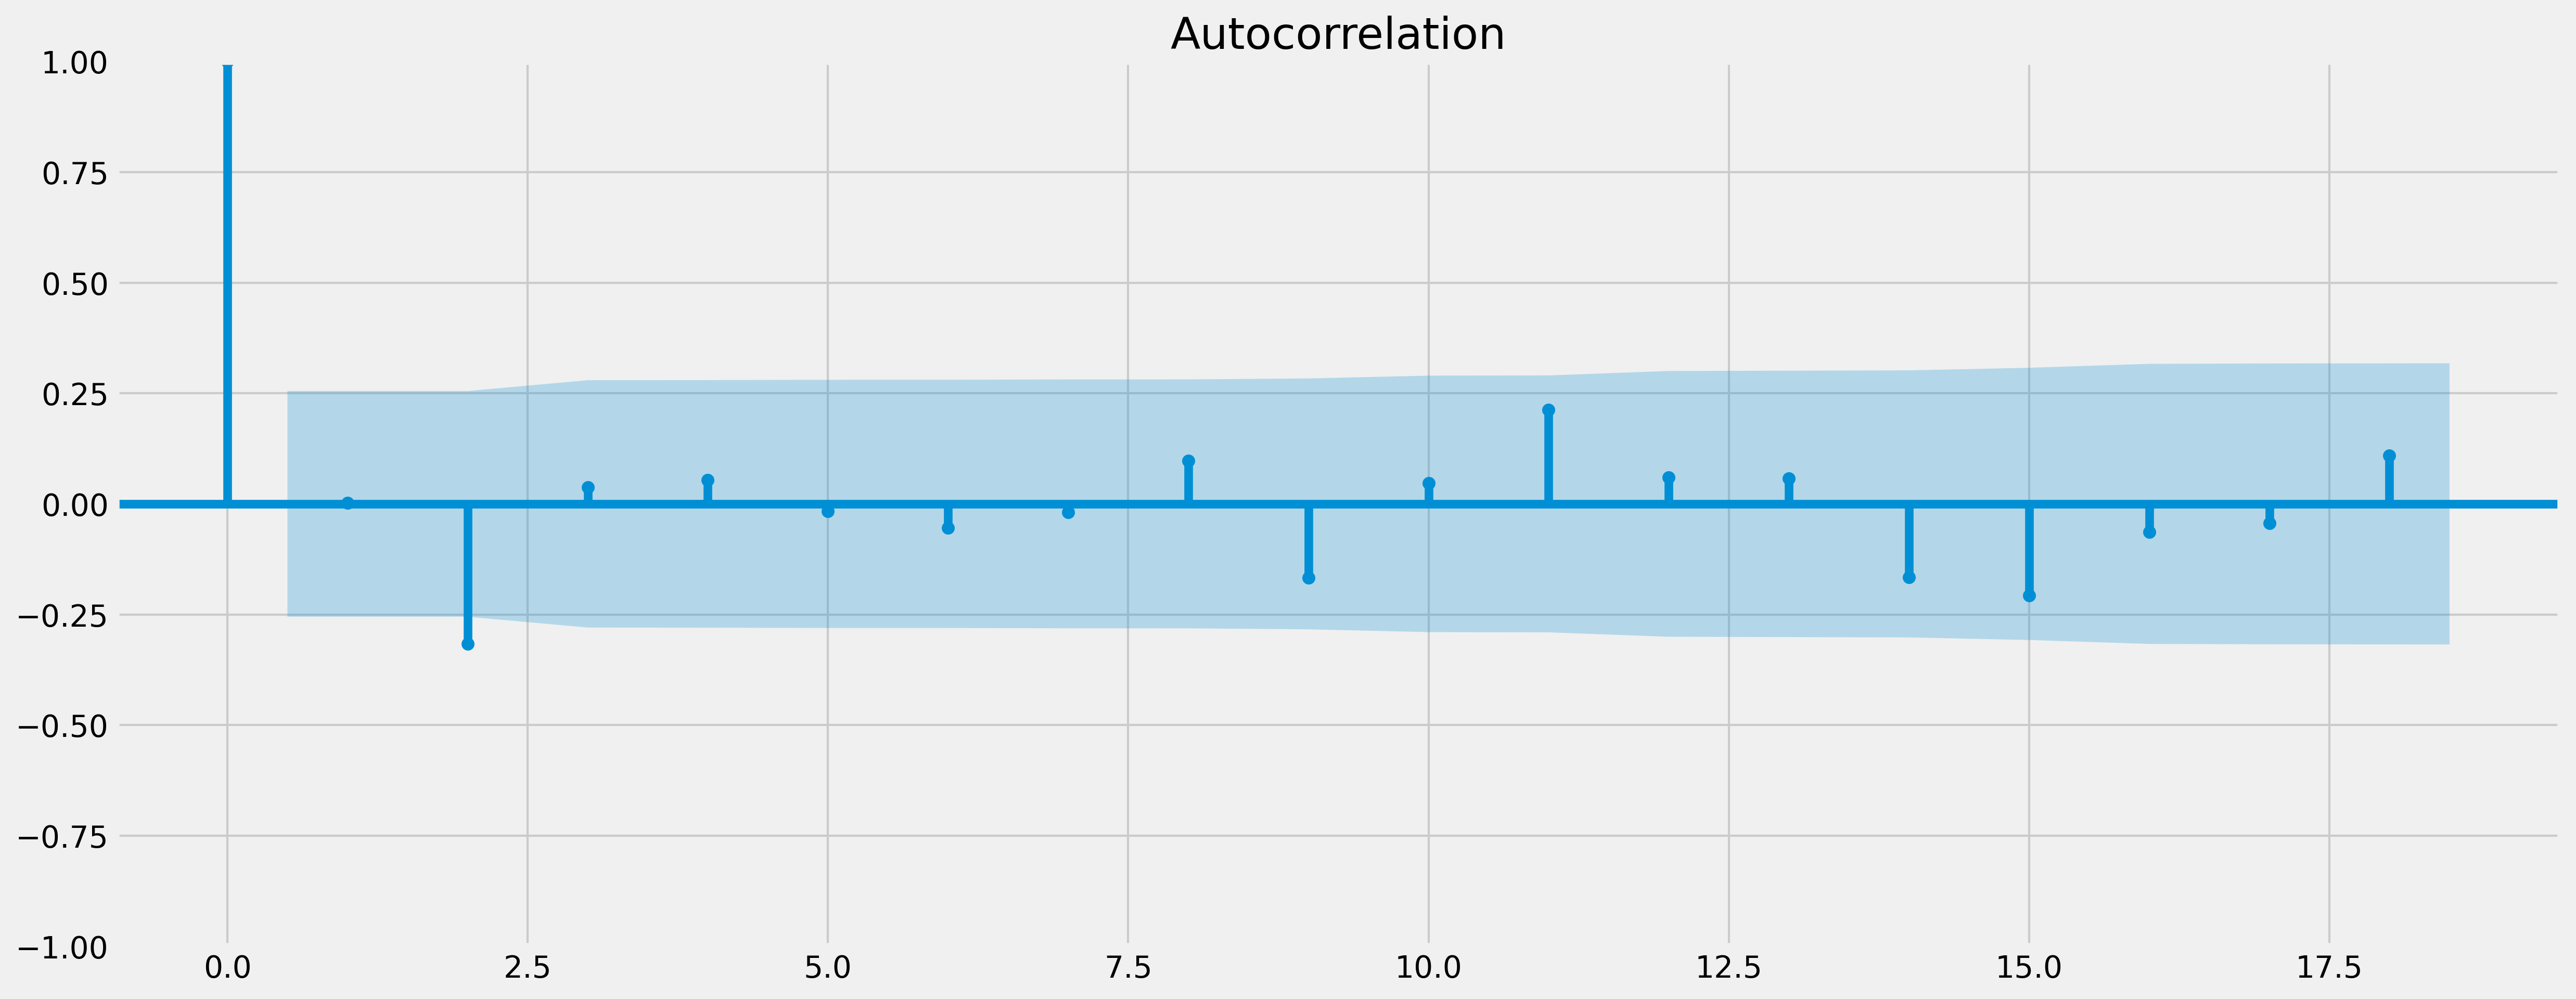

In [28]:
# Checking for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

We're definitely under the rule of thumb saying that 10 lines above the confidence band is when more treatment is necessary. So, data_diff is now stationary.

# Bonus Task

## Forecasting

### Where do we stand?

In [29]:
data_diff

,Value
datetime,
1964-01-01,0.7
1965-01-01,-0.6
1966-01-01,0.3
1967-01-01,-0.2
1968-01-01,-0.6
1969-01-01,-0.3
1970-01-01,0.6
1971-01-01,0.3
1972-01-01,-0.2


In [30]:
# I want counts so I can decide where I want to split training data. Let's add an index back.

data_diff.reset_index()

,datetime,Value
0,1964-01-01,0.7
1,1965-01-01,-0.6
2,1966-01-01,0.3
3,1967-01-01,-0.2
4,1968-01-01,-0.6
5,1969-01-01,-0.3
6,1970-01-01,0.6
7,1971-01-01,0.3
8,1972-01-01,-0.2
9,1973-01-01,-0.6


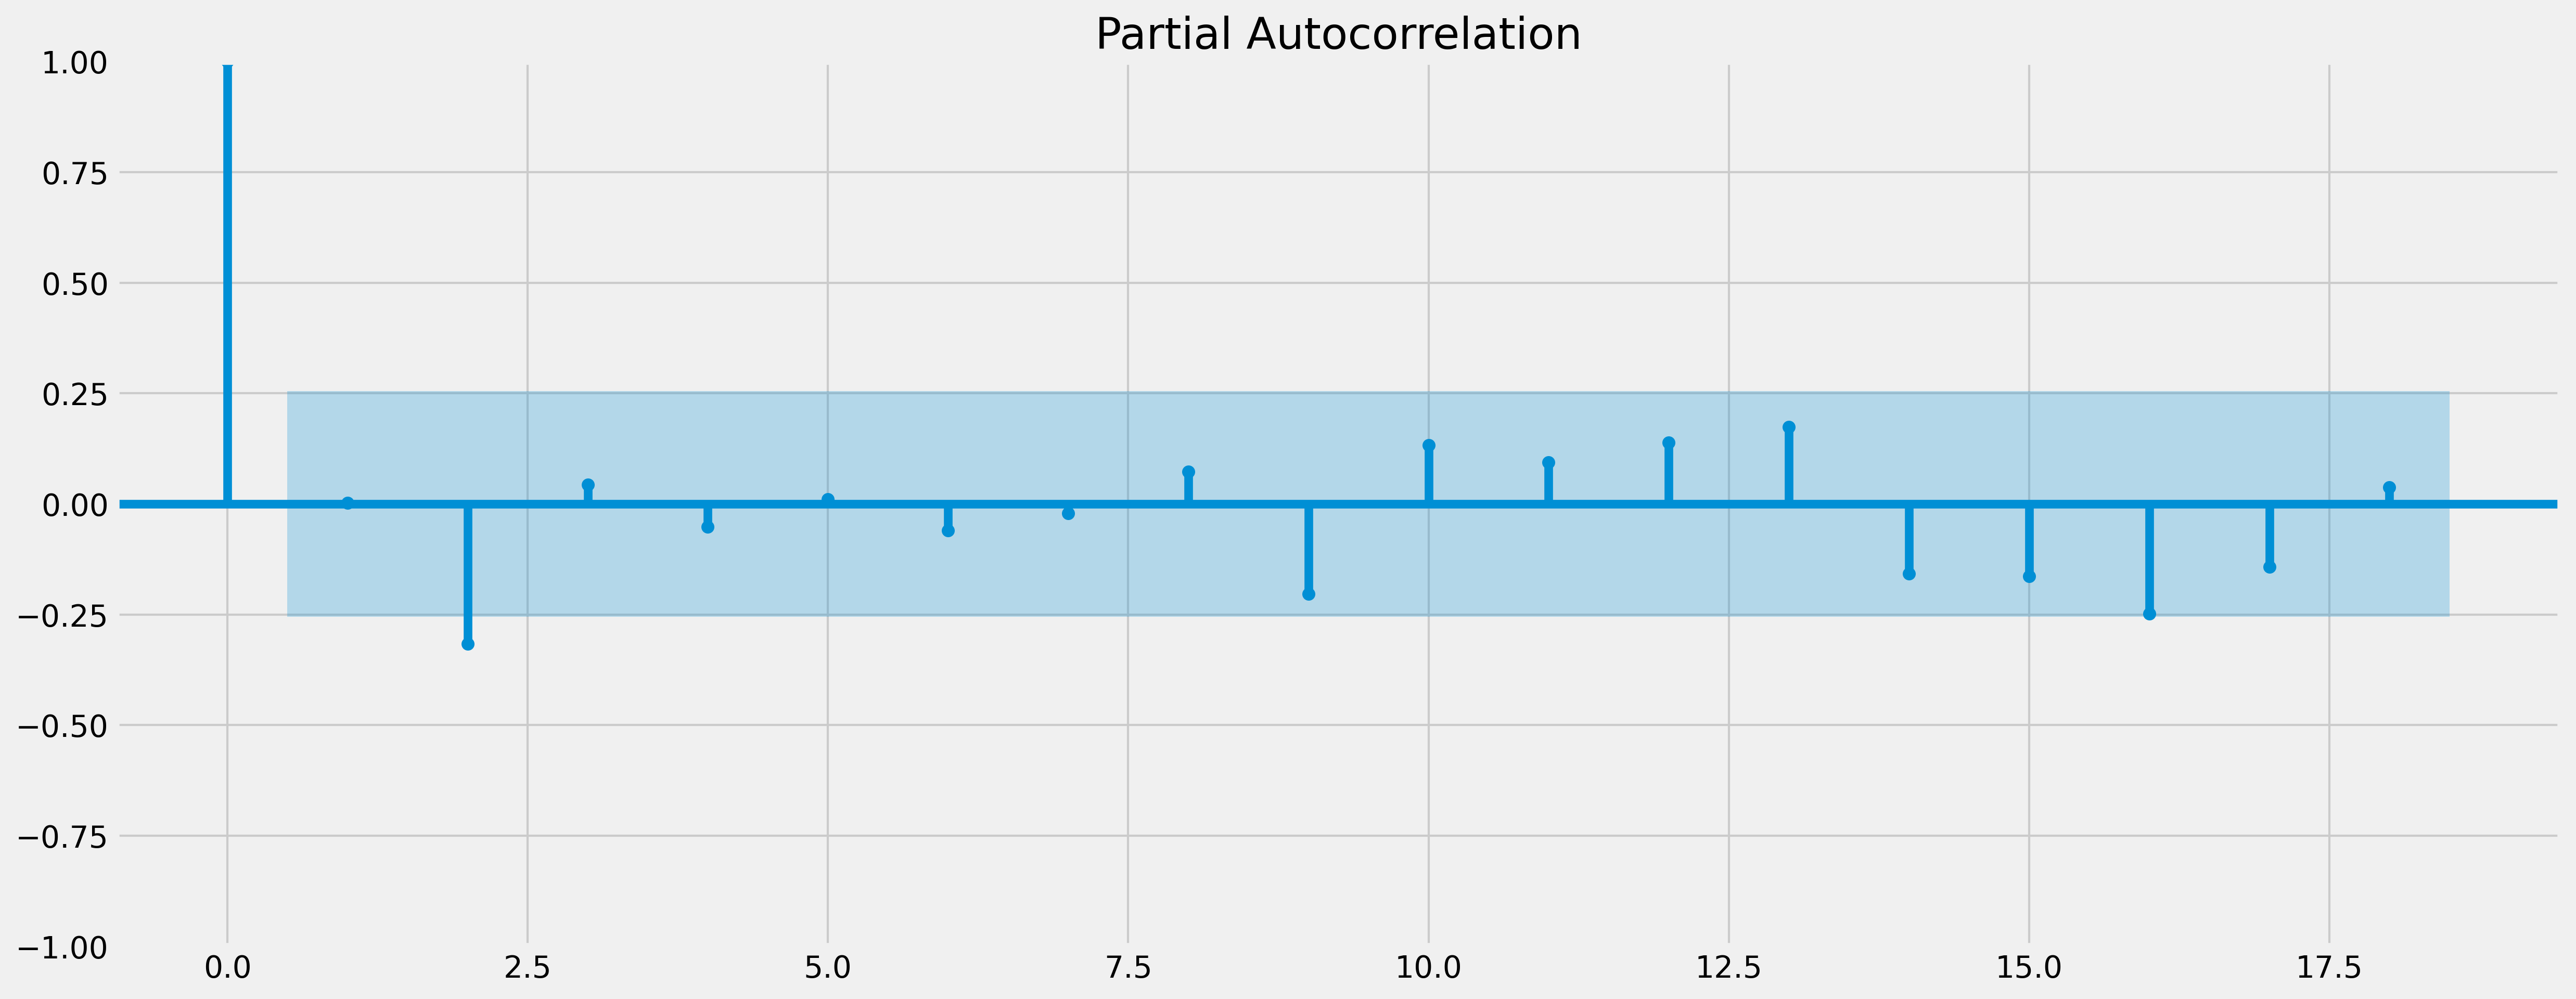

<Figure size 4500x4500 with 0 Axes>

In [31]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

### How many AR and MA terms do you think you'll need for your first iteration?

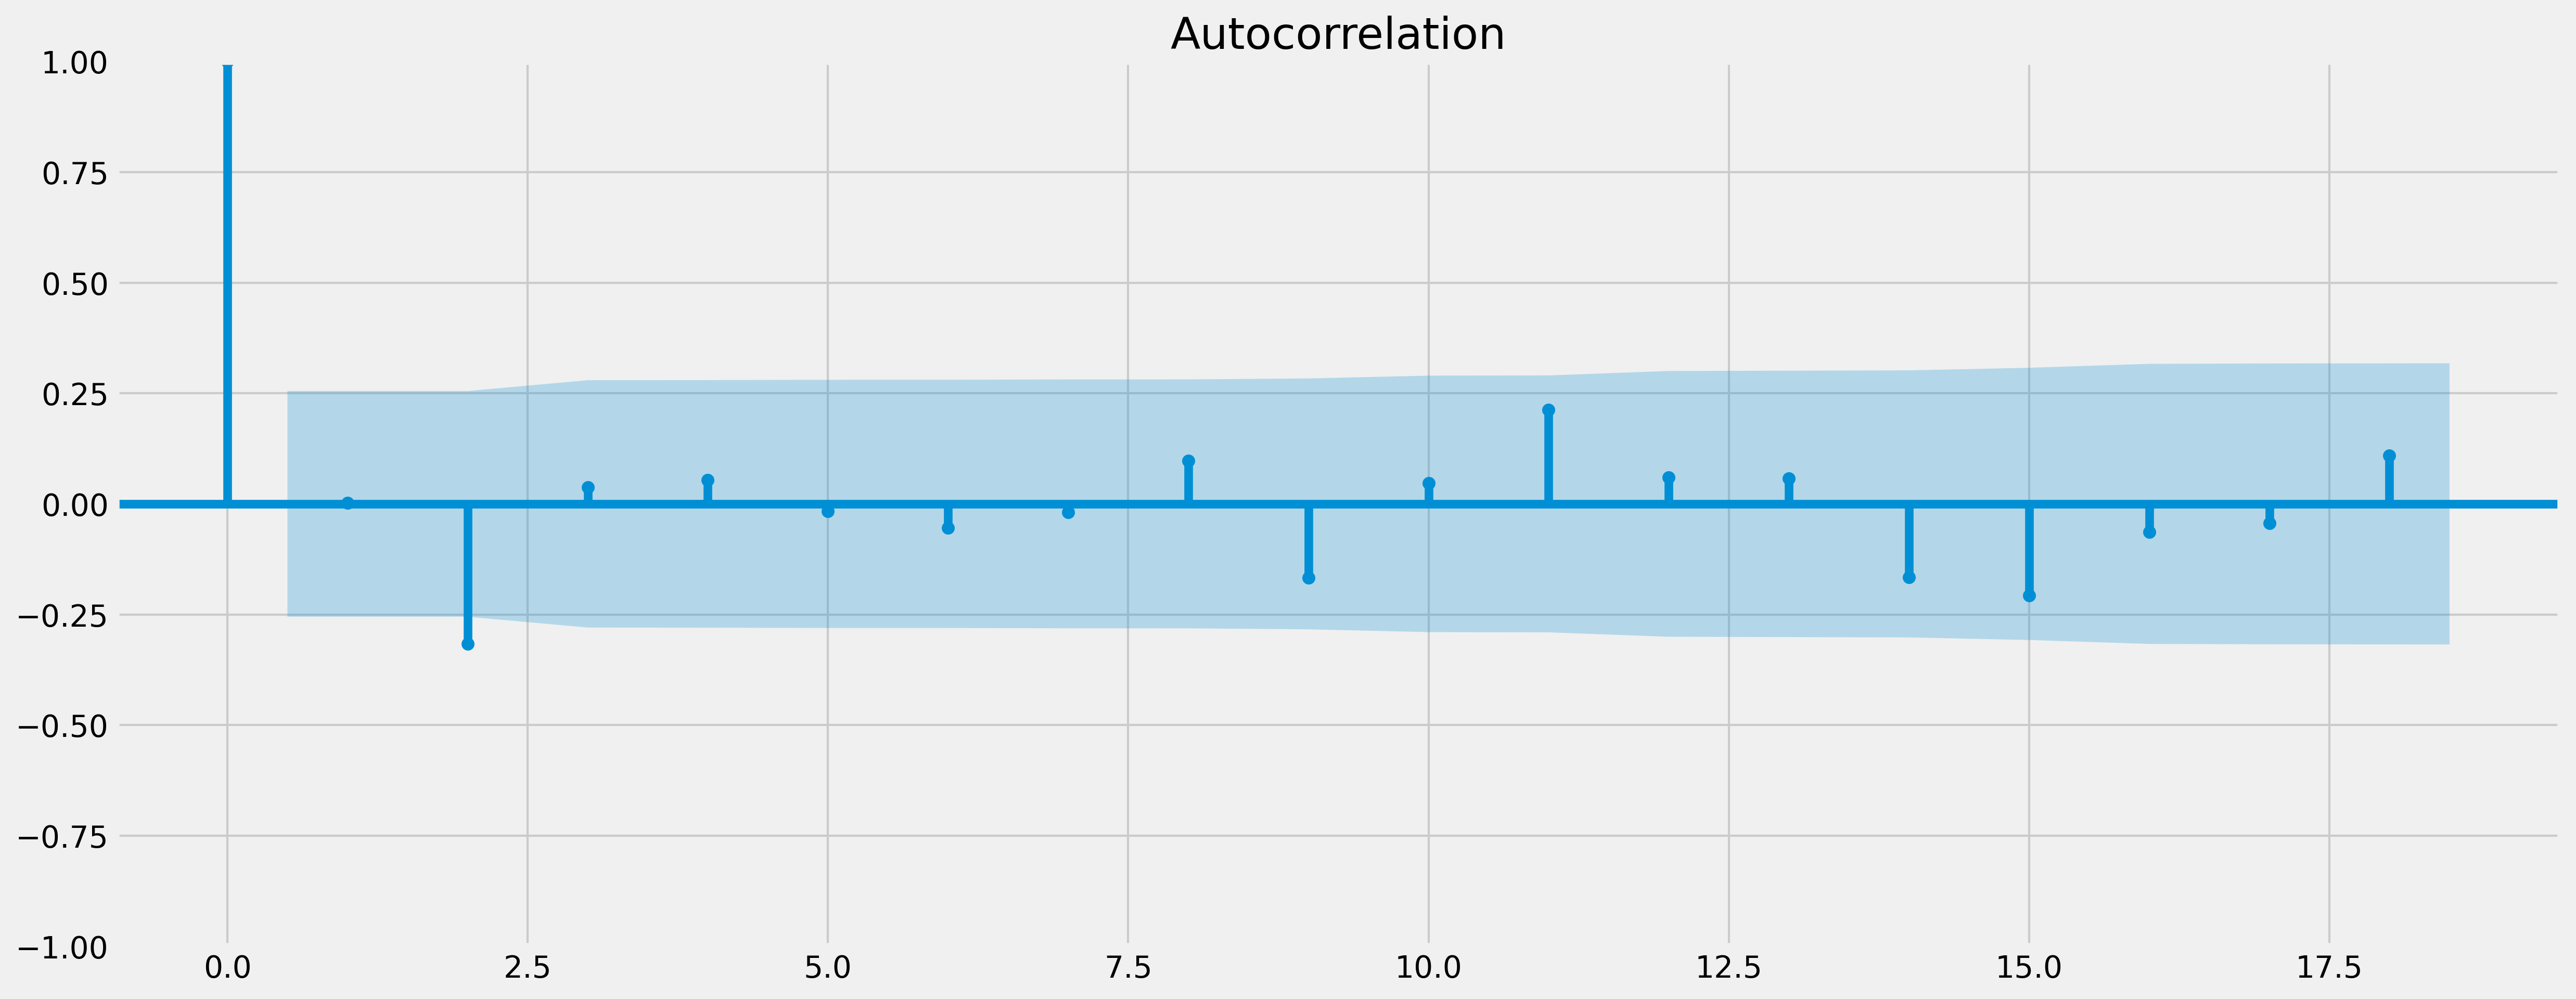

<Figure size 1500x500 with 0 Axes>

In [32]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

### How many AutoRegression and Moving Average values do you think you'll need?

I'm thinking 3 AR should be fine becaues I have only 2 data points outside of the confidence band. 10 MA should be interesting.

In [33]:
# Split the data; went with ~80%

train = data_diff['Value'][:47]
test = data_diff['Value'][46:]

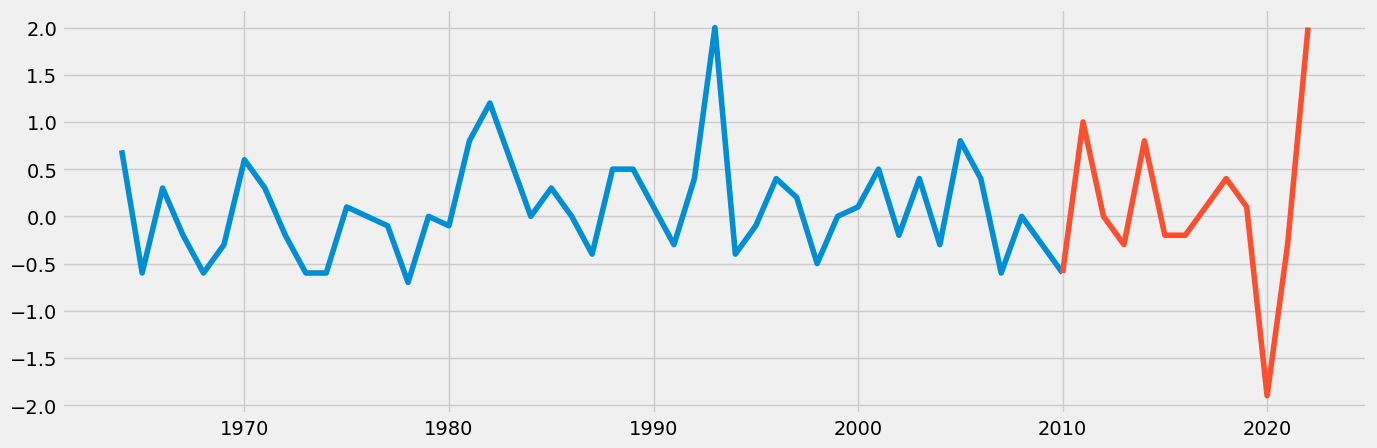

In [34]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [35]:
test.shape

(13,)

## Making the model

In [36]:
from statsmodels.tsa.api import ARIMA # Import the model you need

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   47
Model:                ARIMA(3, 1, 10)   Log Likelihood                 -33.540
Date:                Sat, 06 Sep 2025   AIC                             95.080
Time:                        16:21:45   BIC                            120.681
Sample:                    01-01-1964   HQIC                           104.670
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3006      0.371     -0.810      0.418      -1.028       0.427
ar.L2          0.0130      0.499      0.026      0.979      -0.966       0.992
ar.L3         -0.5011      0.382     -1.312      0.1

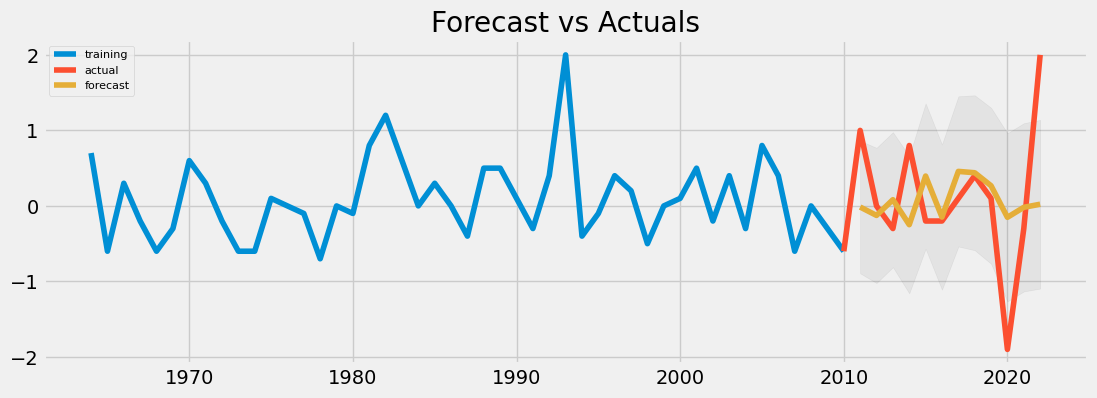

In [37]:
model = ARIMA(train, order=(3, 1, 10))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
# Updated forecast method usage for newer statsmodels versions
fc = fitted.forecast(steps=41)  # Just get the forecast values
# Get the confidence intervals separately
pred_conf = fitted.get_forecast(steps=41).conf_int(alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(pred_conf.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(pred_conf.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### 1st Iteration Summary

My graph is unfortunately very spiky so I wouldn't guess that the forecast would be very close. However, the prediction was better than I thought! Just for grins, let's change some numbers and run it again.

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   47
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -37.653
Date:                Sat, 06 Sep 2025   AIC                             83.306
Time:                        16:21:45   BIC                             90.620
Sample:                    01-01-1964   HQIC                            86.046
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1249      0.158      0.788      0.431      -0.186       0.435
ar.L2         -0.1426      0.241     -0.592      0.554      -0.614       0.329
ma.L1         -0.9988      2.986     -0.335      0.7

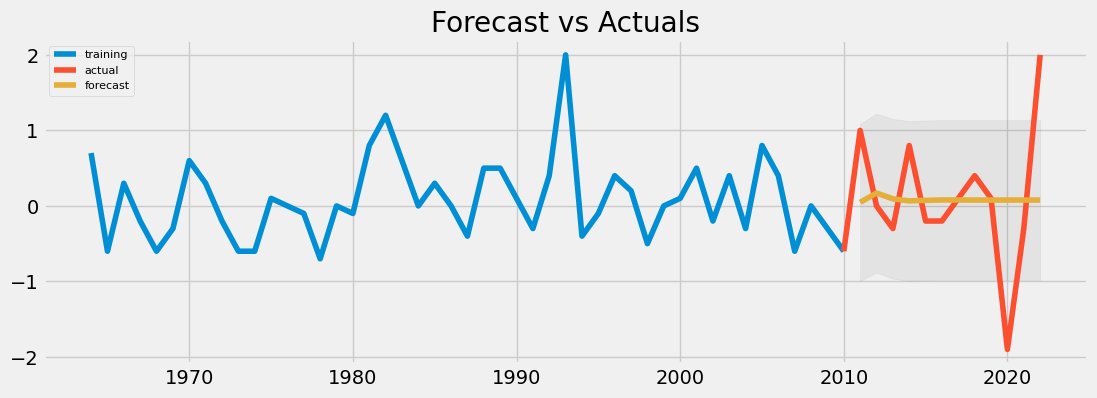

In [38]:
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
# Updated forecast method usage for newer statsmodels versions
fc = fitted.forecast(steps=41)  # Just get the forecast values
# Get the confidence intervals separately
pred_conf = fitted.get_forecast(steps=41).conf_int(alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(pred_conf.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(pred_conf.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### 2nd Summary

This prediction looks overly smooth to me. The confidence banding covers more though so that's good.

I understand that forecasting is tricky and we're looking to generalize instead of match actual data exactly (though for a good forecast, it should be pretty close, in my opinion).

I'm inclined to go with the first iteration, personally, but the 2nd one is a little simpler and wider with less fluctuations so I could see presenting that one instead.

In [43]:
# Assuming GINI is a list that contains a matplotlib figure or axes object
# Option 1: If GINI contains a single figure at a specific index (e.g., 0)
GINI[0].figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'GINI_Trend.png'), bbox_inches='tight')